In [2]:
#LOCAL RUN#
import pandas as pd 
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties
from scipy.spatial.distance import cosine
from tqdm import tqdm
import os


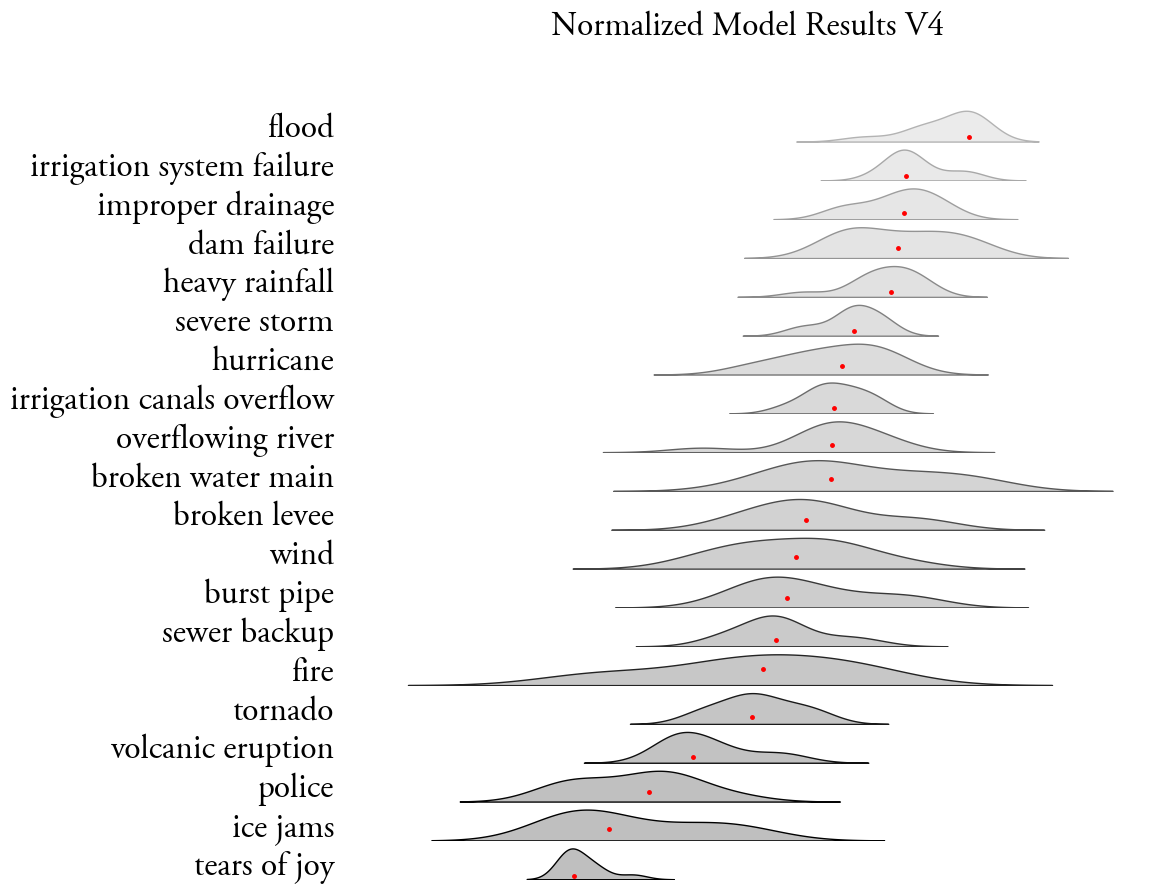

C:\Users\yonat\AppData\Local\Temp\ipykernel_12172\4064386236.py:39: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=distances, ax=ax, fill=True, color=color_shade, lw=1)


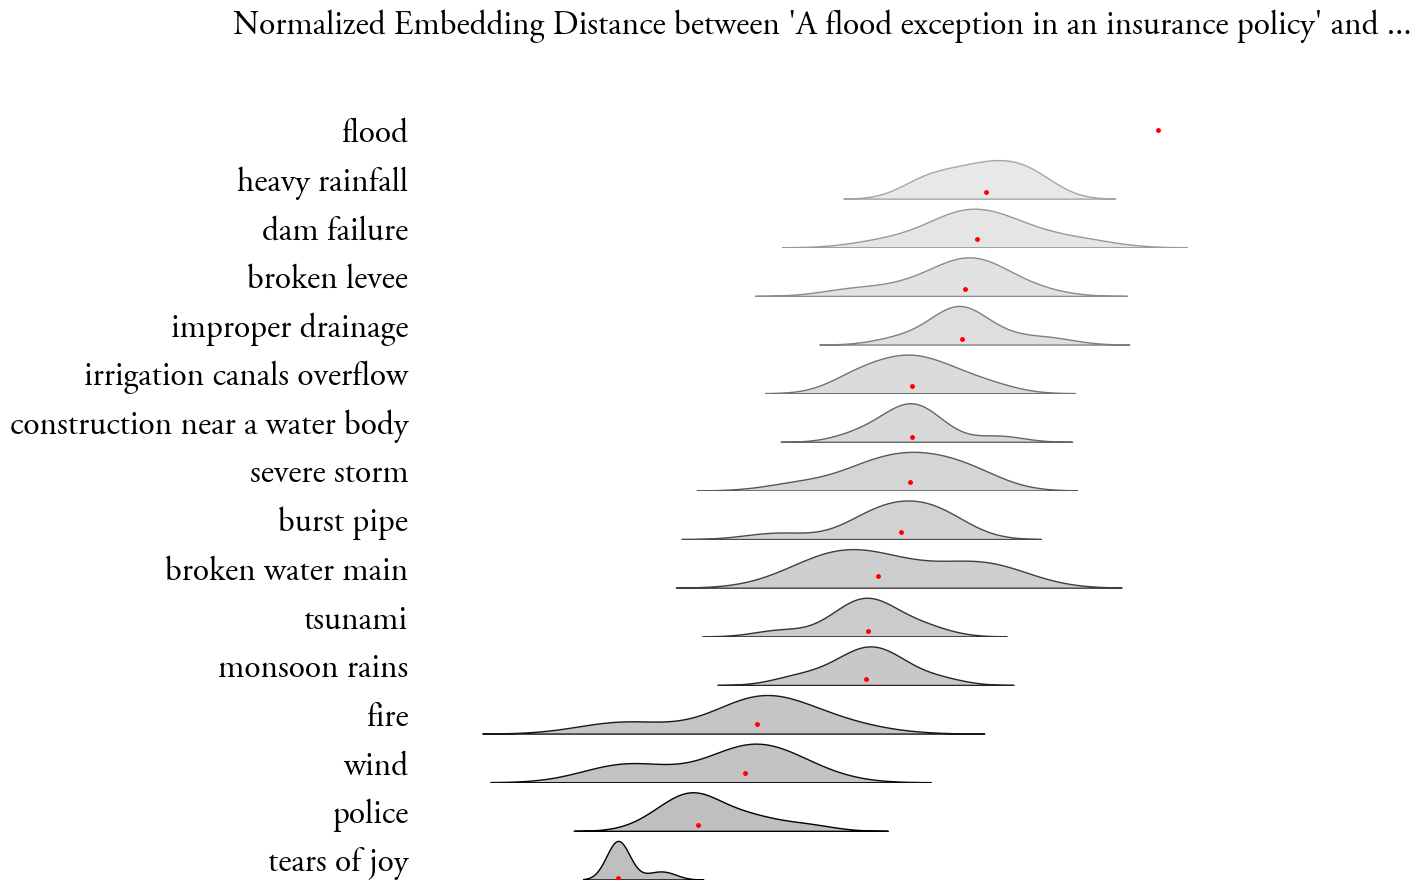

C:\Users\yonat\AppData\Local\Temp\ipykernel_12172\4064386236.py:39: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=distances, ax=ax, fill=True, color=color_shade, lw=1)


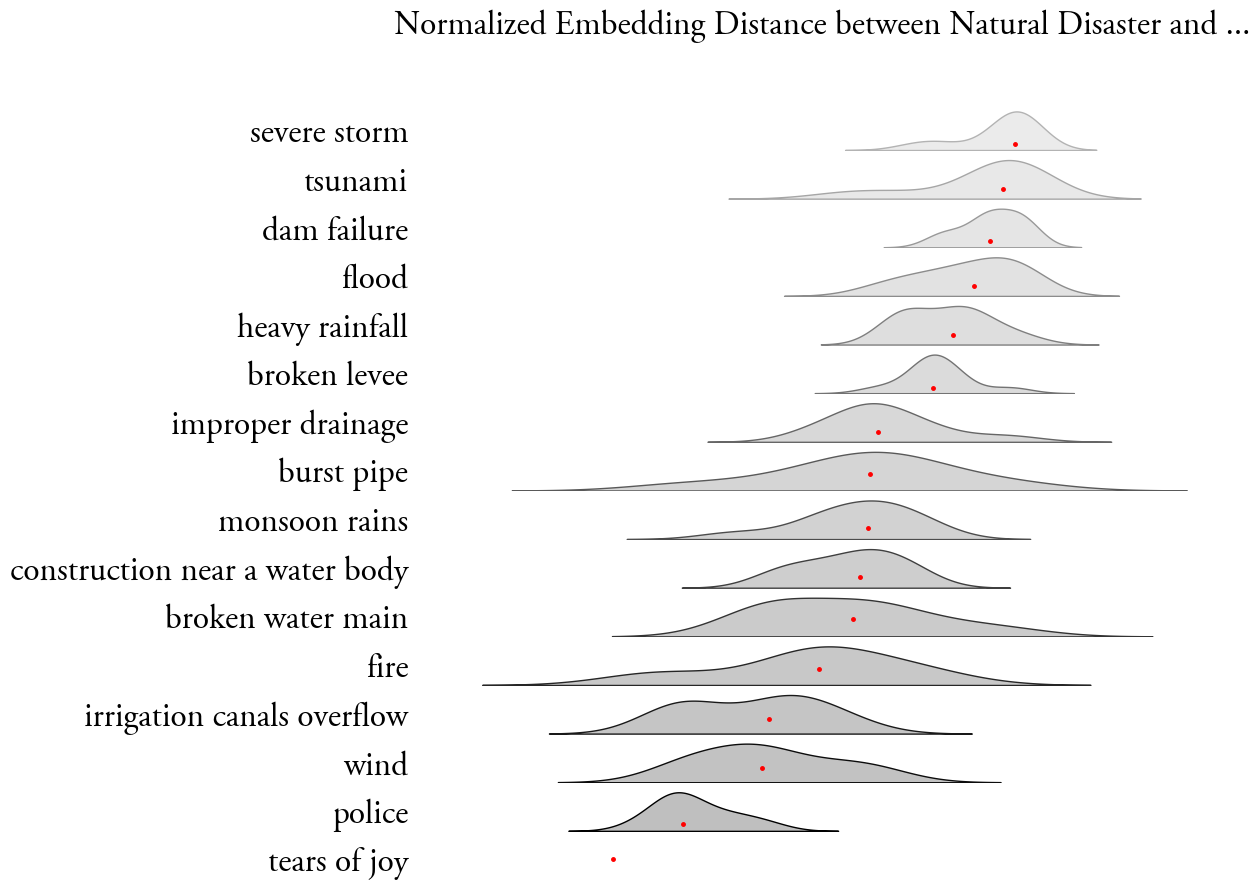

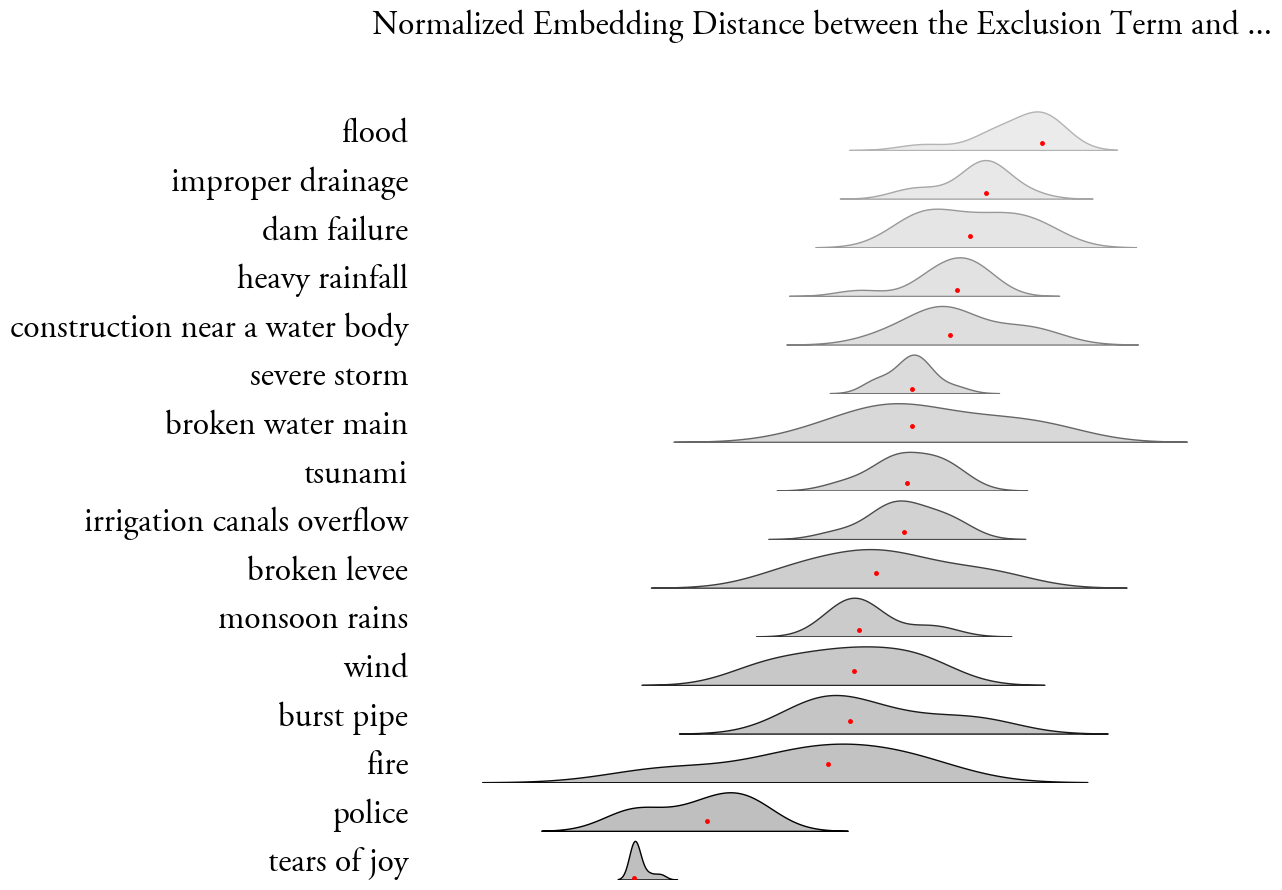

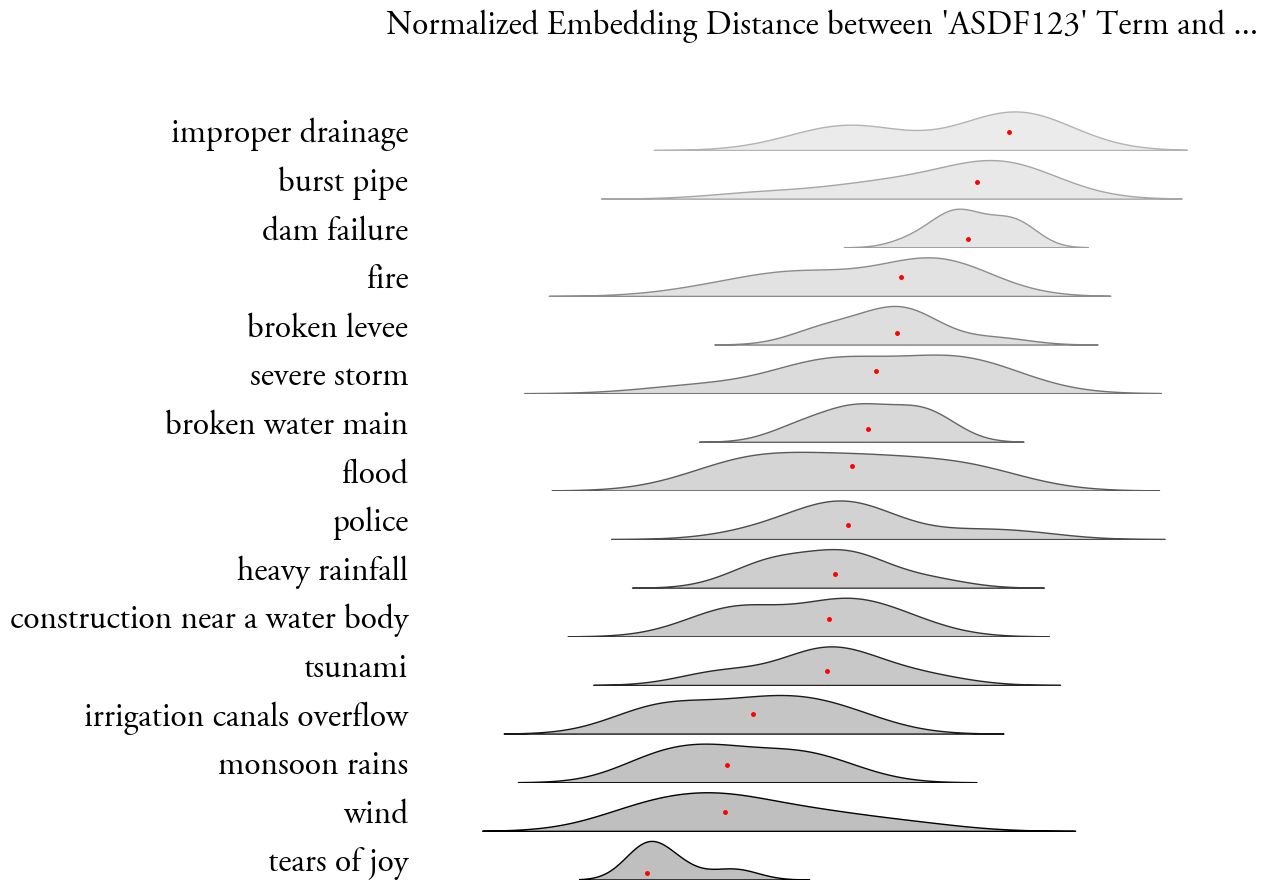

All plots generated with different colormaps and displayed.


In [18]:
font_name = 'Adobe Garamond Pro'
# Normalize using min-max normalization
def normalize_by_model(df, column_name):
    """
    Normalize the distances by model
    """
    # Identify unique models
    models = df['Model'].unique()
    
    for model in models:
        model_data = df[df['Model'] == model]
        min_val = model_data[column_name].min()
        max_val = model_data[column_name].max()
        # Apply normalization for that model
        df.loc[df['Model'] == model, 'Normalized Similarity'] = (model_data[column_name] - min_val) / (max_val - min_val)
    
    return df

def generate_plot(df, title, cmap):
    df = normalize_by_model(df, 'Raw Similarity')
    median_distances = df.groupby('Term')['Normalized Similarity'].median().sort_values(ascending=False)

    plt.rc('font', family=font_name)
    terms = median_distances.index.tolist()
    fig, axs = plt.subplots(len(terms), 1, sharex=True, figsize=(10, 10))

    colormap = plt.get_cmap(cmap)
    
    # Define the range and calculate the step size
    lower_bound = 0.3
    upper_bound = 0.7
    step_size = (upper_bound - lower_bound) / len(terms)
    
    for i, (ax, term) in enumerate(zip(axs, terms)):
        distances = df[df['Term'] == term]['Normalized Similarity'].tolist()
        
        # Adjust shade by incrementing two step sizes
        color_shade = colormap(lower_bound + (i * 2 * step_size))
        sns.kdeplot(x=distances, ax=ax, fill=True, color=color_shade, lw=1)
        
        ax.text(-0.05, 0.4, term, va='center', ha='right', rotation=0, transform=ax.transAxes, fontsize=24)
        ax.plot(median_distances[term], 0.75, color='red', marker='o', markersize=2.5)
        ax.set_ylabel('')
        ax.label_outer()
        ax.set_yticks([])
        ax.set_xticks([])
        for spine in ax.spines.values():
            spine.set_visible(False)

    plt.suptitle("Normalized " + title, fontsize=24)
    sanitized_filename = title.replace(' ', '_').replace(':', '').replace('\\', '')
    filename = 'c:/zevel/normalized_embedding_distances_{}_{}.png'.format(sanitized_filename, cmap)
    plt.savefig(filename, format='png', dpi=300, bbox_inches='tight', transparent=True)
    plt.show()  # Display the plot in the notebook
    plt.close()



'''custom color map'''



# Add custom colormap to the list
colormaps = ['binary']

    
files = [
    r"c:/Users/yonat/Box/Gmailer/All_Model_Results_V4.csv",
    r"c:\Users\yonat\Box\Gmailer\All_Model_Results_A flood exception in.csv",
    r"c:\Users\yonat\Box\Gmailer\All_Model_Results_A natural disaster e.csv",
    r"c:\Users\yonat\Box\Gmailer\All_Model_Results_We do not insure for.csv",
    r"c:\Users\yonat\Box\Gmailer\All_Model_Results_A asdf123 exception .csv"
]


titles_dict = {
    "All_Model_Results_V4.csv": "Model Results V4",   
    "All_Model_Results_A flood exception in.csv": "Embedding Distance between 'A flood exception in an insurance policy' and ...",
    "All_Model_Results_A natural disaster e.csv": "Embedding Distance between Natural Disaster and ...",
    "All_Model_Results_We do not insure for.csv": "Embedding Distance between the Exclusion Term and ...",
    "All_Model_Results_A asdf123 exception .csv": "Embedding Distance between 'ASDF123' Term and ..."
}


for file in files:
    df = pd.read_csv(file)
    file_name = os.path.basename(file)
    title = titles_dict.get(file_name, file_name)
    for cmap in colormaps:
        generate_plot(df, title, cmap)

print("All plots generated with different colormaps and displayed.")